<h1><center>𝓦𝓸𝓻𝓴𝓲𝓷𝓰 𝔀𝓲𝓽𝓱 𝓦𝓸𝓻𝓭 𝓥𝓮𝓬𝓽𝓸𝓻𝓼 𝓪𝓷𝓭 𝓢𝓮𝓶𝓪𝓷𝓽𝓲𝓬 𝓢𝓲𝓶𝓲𝓵𝓪𝓻𝓲𝓽𝔂 😁</center></h1>

[**Code**](https://github.com/PacktPublishing/Mastering-spaCy/tree/main/Chapter05)

The word vector is just a dense representation of the words. The word vectors have semantically similar words have similar word vectors. Word vectors are great for calculating the similarity between `words`, `phrases`, `sentences`, `documents`. At a word level words vectors can give the information about semantic analogies(ஒப்புமைகள்), and more. 

Word vectors are produced by algorithms that make use of the fact that
similar words appear in similar contexts. To capture the meaning of a word,
a word vector algorithm collects information about the surrounding words
that the target word appears with.

The **paradigm(முன்னுதாரணம்)** of capturing the words with surrounding words is called **`distribution semantics`**

<img src="https://miro.medium.com/max/1400/1*W6c42Kmc1WIB0rH3VfNCTg.png" width="800"/>

## Understanding Word Vectors 

The statistical world works with numbers, and all statistical methods,
including statistical NLP algorithms, work with vectors. As a result, while
working with statistical methods, we need to represent every real-world
quantity as a vector, including text. 

One of the easy to represent a sentence is one hot encoding, (we seen a lot, so I am not going to cover this, if you want go to page number 229 and explore that). 

We know one hot encoding is lot's of dis-advantage: 

First is it represent the words in sparse vector ( I mean if you vocabulary size in 100k, each word will represent as 100k vector dimension, In other words each words represent as **N**, **V** matrix where **N** is the number of words and **V** is the vocabulary size). 

Second they don't carry any infomation at all, like the In the preceding
vocabulary, the words cheese, topping, salami, and pizza actually carry
related meanings, but their vectors are not related in any way. These
vectors are indeed assigned randomly, depending on the corresponding
word's index in the vocabulary

Due to lot of problem in the simple representation, they invented the **word vectors**

### Word Vectors: 

It solves the preceding problems. A word vector is **`fixed size`**, **`dense`**, and **`real valued vector`**

<img src='images/word_vector.png' width="800"/> 

This is a 50-dimensional vector for the word the. As you can see, the
dimensions are floating points. But what do the dimensions represent? These
individual dimensions typically don't have inherent meanings. Instead, they
represent locations in the vector space, and the distance between these
vectors indicates the similarity of the corresponding words' meanings.
Hence, a word's meaning is distributed across the dimensions. This way of
representing a word's meaning is called **`distributional semantics`**.


Word vectors can capture synonyms, antonyms, and semantic categories such
as animals, places, plants, names, and abstract concepts. 

Explore the tensorflow **word vector** [**website**](https://projector.tensorflow.org/) to see the vectors visually!

### Analogies and vector operations: 

We have already seen that, word vectors capture the semantics meanings, but we can also do some more operations like vector multiplication, division and subraction, and more.. That's why word vector support analogies. 

A word analogy is the semantic relationship between a pair of words. It can able to carry relationship between words such as (King – man, Queen – woman), (airplane –
air, ship - sea), (fish – sea, bird - air), (branch – tree, arm – human),
(forward – backward, absent – present), and so on. 

For example, we can represent gender mapping between the Queen and King
as Queen – Woman + Man = King. Here, if we subtract woman from Queen
and add man instead, we get King. Then, this analogy reads as, queen is to
king as woman is to man. Embeddings can generate remarkable analogies
such as gender, tense, and capital city. 

<img src="images/vis.png" width="700"/>

### How word to vector are produced? 

This vectors are produced by many ways some of the popular ways are **word2vec**, it was developed by google brain and it uses the neural network to produe the word2vec. 

[**Glove**](https://www.youtube.com/watch?v=Fn_U2OG1uqI) it was developed by standford NLP uses the single value decomposition, using a co-occurence matrix and if you want to download this [**hit**](https://nlp.stanford.edu/projects/glove/)

**FastText** was created by Facebook Research and is similar to word2vec,
but offers more. word2vec predicts words based on their surrounding
context, while fastText predicts subwords; that is, character n-grams. For
example, the word chair generates the following subwords:
ch, ha, ai, ir, cha, hai, air
fastText produces a vector for each subword, including misspelled words,
numbers, partial words, and single characters. fastText is robust when it
comes to misspelled words and rare words. It can compute a vector for the
tokens that are not proper lexicon words.

This all are pre-trained models, if you want to train your own model you can use this library [**Gensim**](https://radimrehurek.com/gensim/)

And more ways available check it [**out**](https://developer.syn.co.in/tutorial/bot/oscova/pretrained-vectors.html#word2vec-and-glove-models) 

And if you have any doubt in word vector you can use this blog to understand clearly [**Click**](https://jalammar.github.io/illustrated-word2vec/)

### Using spaCy pretrained vectors 

We can directly use the pre-trained vector after calling the doc object. whereaas the **medium** model produce **300-dimensional** vectors for **20,000** words, while the **large** model produce the **300-dimensional** for **685,000** vocabulary. 


Typically, small models (those whose names end with sm) do not include any
word vectors but include context-sensitive tensors. 

This is how we produce the word vectors 

```Python 
import spacy 
import en_core_web_md 

nlp = en_core_web_md.load() 

doc = nlp("I ate a banana.")

len(doc[3].vector)  # bananana 

# output 

300 dimensions
```

In [4]:
import spacy 
import en_core_web_md 

nlp = en_core_web_md.load() 

doc = nlp("I ate a banana.")

print(len(doc[3].vector)) 

print(type(doc[3].vector))

print(doc[3].vector.shape)

300
<class 'numpy.ndarray'>
(300,)


The doc and span objects also have a **word vectors**, you can all after calling this containers also. 



In [7]:
doc = nlp("I like a banana,")
doc.vector
len(doc[1:3].vector)  # like a 

300

If you want to check the **oov_vocabulary** or oov_words you can use this following code pattern: 

In [12]:
doc = nlp("You went there afskfsd.") 

for token in doc: 
    print(token, token.is_oov, token.has_vector,)

You False True
went False True
there False True
afskfsd True False
. False True


This is how we call the pre trained word vectors, let's see how to find the differnce between them (similarity)

### The Similarity Method


In spacy, every type of container has a pre-trained word vectors that allows us to find the similarity between the word vectors. we can calculate the semantic similarity between two container objects, even we can calculate the similarity between two differnt container objects. 

The values ranges between **0** to **1**. 

    0 -> un releated,
    1 -> identical 

See, we are calculating the similarity between doc and token objects: 

In [13]:
doc1 = nlp("I visited England.")
doc2 = nlp("I went to London.")

doc1[1:3].similarity(doc2[1:4])  # token similarity 

0.6539691

In [16]:
doc1[2].similarity(doc2[3])  # word similarity 

0.7389128

In [18]:
doc1.similarity(doc2)  # sentence similarity 

0.8771558796234277

Judging the distance with numbers is difficult sometimes, but looking at the vector on paper can also help us to understand how the vocabulary words are grouped. Let's see in matplotlib

C:\Users\aravi\AppData\Local\Temp/ipykernel_12360/3795111206.py:5: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



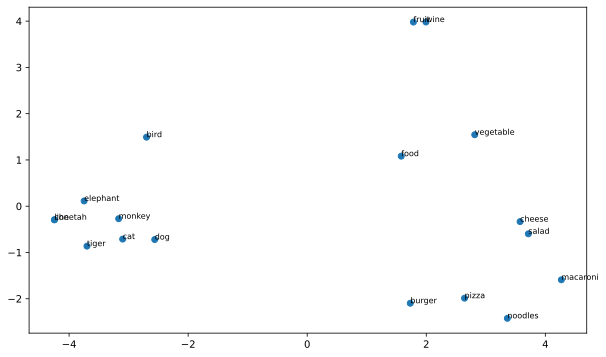

In [66]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from IPython import display 
display.set_matplotlib_formats('svg') 

vocab = nlp("cat dog tiger elephant bird monkey lion cheetah burger pizza food cheese wine salad noodles macaroni fruit vegetable")
words = [i.text for i in vocab if i.has_vector]  # it don't remove stopwords just tokenize the sentences 

vecs = np.vstack( [word.vector for word in vocab if word.has_vector] ) 

pca = PCA(n_components = 2) 
vecs_transformed = pca.fit_transform(vecs) 

plt.figure(figsize = (10,6)) 
plt.scatter(vecs_transformed[:,0], vecs_transformed[:,1]) 

for word, coord in zip(words, vecs_transformed): 
    x, y = coord
    plt.text(x, y, word, size = 8) 


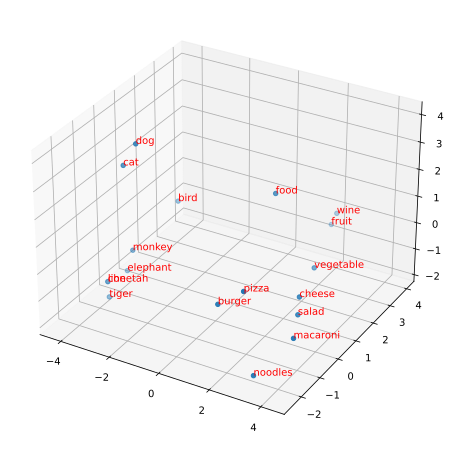

In [52]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (15,8))
ax = plt.axes(projection='3d')


pca = PCA(n_components = 3) 
vecs_transformed = pca.fit_transform(vecs) 

ax.scatter( (vecs_transformed[:,0]), (vecs_transformed[:,1]), (vecs_transformed[:,2]), 'gray' ) 

for word, coord in zip(words, vecs_transformed): 
    x, y, z = coord
    ax.text(x, y, z, word, color = 'red')


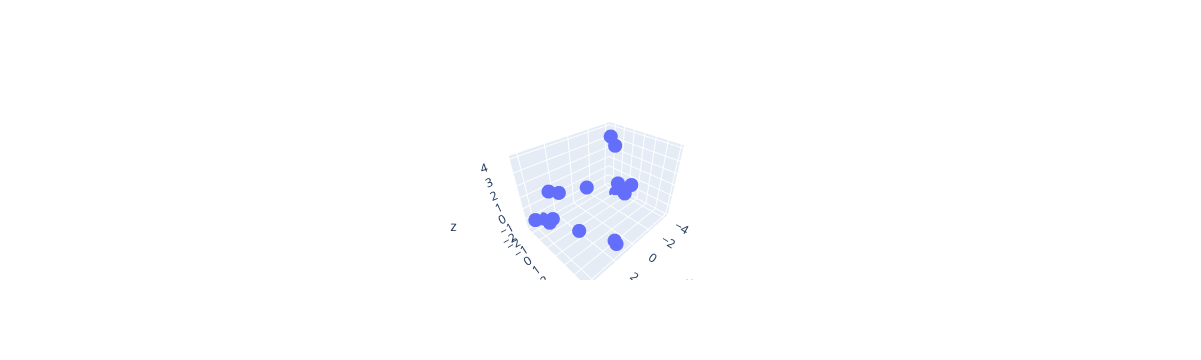

In [64]:
import plotly.express as px
import plotly.graph_objects as go
x = vecs_transformed[:,0]
y = vecs_transformed[:,1]
z = vecs_transformed[:,2]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers')])
fig.show()

Instead of using, this you can download third party word vectors to perform same kind of operations, if you want more detail refer (247 - 249) 

### Understanding semantic similarity methods: 

Before in this chapter, we have looked on the **similarity** score in the spacy, now let's discuss more on detail, how to interpt the similarity score and understand how it's calculated. 

When we collect the any sort of data, we will try to see the difference between two words, in simple we want to measure how similar two pieces of text are calculating of text by their similarity scores. similarity score is nothing but the distance between two vectors. Two calculate the distance between two vectors people oftenly uses **eucledian distance** and the **cosine distance**. 

#### Eucledian Distance 

Eucledian Distance is calculated by the **Pythagoream theorem**. We calculate this distance by summing the difference of each coordinate's square and then taking the square root of this sum.

<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0957417420302244-gr3.jpg" width="300"/>

What does the Score of **Eucledian Distance** mean? First, Euclidian
distance has no idea of vector orientation; what matters is the vector
magnitude. If we take a pen and draw a vector from the origin to the dog
point (let's call it dog vector) and do the same for the cat point (let's call it
cat vector) and subtract one vector from and other, then the distance is
basically the magnitude of this difference vector.


What happens if we add two more semantically similar words (canine,
terrier) to dog and make it a text of three words? Obviously, the dog vector
will now grow in magnitude, possibly in the same direction. This time, the
distance will be much bigger due to geometry (as shown in the following
diagram), although the semantics of the first piece of text (now dog canine
terrier) remain the same.


This is the main drawback of using Euclidian distance for semantic similarity
– the orientation of the two vectors in the space is not taken into account.

<img src="images/draw.png" width="300"/>


To overcome this problem, we use another method called **cosine distnce and the similarity **. 

#### Cosine distance and the Similarity 

Contray to eucledian distance, cosine distance is more concerned about the orientation of the two vector in the feature space. The result is just the cosine of the angle between two vectors. 

In high level, we are measuring the two angles instead of measuring the distance. 
When the cosine similarity is 1 the angle between the two vectors is 0 degrees, similarly is 0, it mean angle between the vector is 90 degree. 

**Note**: We are calculating **Semantic Simlarity** score **not** the **distance**.  The highest possible value is 1 when the vectors coincide, while
the lowest score is 0 when two vectors are perpendicular.

spaCy uses cosine similarity to calculate semantic similarity. Hence, calling
the similarity method helps us make cosine similarity calculations.

<img src="https://images.deepai.org/glossary-terms/cosine-similarity-1007790.jpg" width="700"/>


     1 -> those vectors are very similar 
    
     0 -> Those vectors are not similar 

### Categorizing text with Semantic Similarity 

In simple words, if you have word **"Perfume"** you want to find which sentence is releated to this word. 

In [92]:
sentences = nlp("I purchased a science fiction book last week. I loved everything related to this fragrance: light, floral and feminine... I purchased a bottle of wine.")

key = nlp("perfume")  # key value 

for i in sentences.sents: 
    print(i.similarity(key))
                
          

0.2481654331382154
0.5075296782702482
0.4215429463030136


This approach is very good, but if you are working in a very large database, some times you will get a error with the sentences, To improve the performance we can extract the **important words**. 

### Extracting key phrases 
The Better way of finding the word with the group of sentences we need to extract the important words/phrases and compare them in search key. Instead of comparing the key to different kind of parts of speech, we can compare the key to noun phrases. **Noun phrases are the subjects, direct objects, and
indirect objects of the sentences and carry a big percentage of the sentence's
semantics on their shoulders.**

What is a noun phrase, then? **A noun phrase (NP) is a group of words that
consist of a noun and its modifiers. Modifiers are usually pronouns,
adjectives, and determiners.** 


We can see the noun phrases of a sentence by using the doc.noun_chunks
method:

```Python 
doc = nlp("My beautiful and cute dog jumped over the fence")
doc.noun_chunks  # it is actually a generator 
print(list(doc.noun_chunks)) 

# output 
[My beautiful and cute dog, the fence]
```

In [93]:
doc = nlp("My beautiful and cute dog jumped over the fence")
doc.noun_chunks  
print(list(doc.noun_chunks)) 

[My beautiful and cute dog, the fence]


To get the better improvements, we need to search our key to noun.chunks in the inputs

In [100]:
for sent in sentences.sents: 
    nchunks = [ nchunk.text for nchunk in sent.noun_chunks ] 
    nchunks_doc = nlp(" ".join(nchunks)) 
    
    print(nchunks_doc.similarity(key))  # key -> fragnance 


0.21390893517254456
0.6370830556977022
0.44506394225111023


**Just Compare this output and normal output in the previous cell**

### Extracting and comparing named entities

In some cases, instead of extracting every noun, we will only focus on the
proper nouns; hence, we want to extract the named entities. Look this paragraph 

```Text 
"Google Search, often referred as Google, is the most popular
search engine nowadays. It answers a huge volume of queries every
day."

"Microsoft Bing is another popular search engine. Microsoft is
known by its star product Microsoft Windows, a popular operating
system sold over the world."

"The Dead Sea is the lowest lake in the world, located in the
Jordan Valley of Israel. It is also the saltiest lake in the
world."
```

Our code should be able to recognize that the first two paragraphs are about
large technology companies and their products, while the third paragraph is
about a geographic location.

Comparing all the noun phrases in these sentences may not be very helpful
because many of them, such as volume. 

**The meaning of this section,when you have meaning less words if you can use entities, you can get good similarity score .**

In [103]:
doc1 = nlp("Google Search, often referred as Google, is the most popular search engine nowadays. It answers a huge volume of queries every day.")
doc2 = nlp("Microsoft Bing is another popular search engine. Microsoft is known by its star product Microsoft Windows, a popular operating system sold over the world.")
doc3 = nlp("The Dead Sea is the lowest lake in the world, located in the Jordan Valley of Israel. It is also the saltiest lake in the world.")

ents1 = [ent.text for ent in doc1.ents]
ents2 = [ent.text for ent in doc2.ents]
ents3 = [ent.text for ent in doc3.ents]

ents1 = nlp(" ".join(ents1))
ents2 = nlp(" ".join(ents2))
ents3 = nlp(" ".join(ents3))

print(ents1.similarity(ents2)) 
print(ents2.similarity(ents3)) 
print(ents3.similarity(ents1))


0.5394545341415748
0.39674956866863936
0.48605042335384385
